# Proyecto 2 y 3 - Introduccion a la ciencia de datos
* Alejandro Marin Hoyos
* Manuel Antonio Vidales
* Yessica Fernanda Villa  
### 3. Implementación de Modelos Predictivos

In [11]:
!pip install scikit-learn xgboost

  Using cached xgboost-3.0.0-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-manylinux_2_28_x86_64.whl (253.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 26.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]━━━ 1/2 [xgboost]


Importacion de las librerias necesarias

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

## 3.1. Preparación de los Datos

**Carga del Dataset:**
- Se cargó el dataset limpio `avocado_clean.csv`.

**Separación de Variables:**
- **Features (`X`)**: Todas las variables excepto `AveragePrice`.
- **Target (`y`)**: Variable `AveragePrice`.

**División del Dataset:**
- Se dividió el dataset en conjunto de entrenamiento (70%) y de prueba (30%).
- Semilla aleatoria (`random_state=42`) para garantizar reproducibilidad.

**Escalado de Variables Numéricas:**
- Se aplicó estandarización (`StandardScaler`) a las siguientes variables numéricas:
  - `Total Volume_log`
  - `4046`
  - `4225`
  - `Total Bags`
- Las variables dummy no fueron escaladas.

**Resultados:**
- Forma del conjunto de entrenamiento: `(X_train.shape)`
- Forma del conjunto de prueba: `(X_test.shape)`


In [4]:
# Cargar dataset limpio
avocado = pd.read_csv('../data/avocado_clean.csv')

# Separar features y target
X = avocado.drop('AveragePrice', axis=1)
y = avocado['AveragePrice']

# Dividir en train (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar features (excepto variables dummy)
scaler = StandardScaler()
numeric_cols = ['Total Volume_log', '4046', '4225', 'Total Bags']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (12774, 25), Test shape: (5475, 25)


## 3.2. Modelo 1: Regresión Lineal

### Implementación

**Entrenamiento:**
- Se entrenó un modelo de regresión lineal (`LinearRegression`) utilizando el conjunto de entrenamiento.

**Evaluación:**
- Se realizaron predicciones sobre el conjunto de prueba.
- Se calcularon las siguientes métricas:
  - **Error cuadrático medio (MSE):** `mse_lr`
  - **Coeficiente de determinación (R²):** `r2_lr`

**Resultados:**
- **MSE:** *(valor obtenido)*  
- **R²:** *(valor obtenido)*

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenamiento
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test)

# Métricas
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal:")
print(f"- MSE: {mse_lr:.4f}")
print(f"- R²: {r2_lr:.4f}")

Regresión Lineal:
- MSE: 0.0854
- R²: 0.4705


## 3.2. Modelo 2:Random Forest Regressor

**Entrenamiento:**
- Se entrenó un modelo `RandomForestRegressor` con los siguientes parámetros:
  - `n_estimators=200`
  - `max_depth=10`
  - `random_state=42`

**Evaluación:**
- Se realizaron predicciones sobre el conjunto de prueba.
- Se calcularon las siguientes métricas:
  - **Error cuadrático medio (MSE):** `mse_rf`
  - **Coeficiente de determinación (R²):** `r2_rf`

**Resultados:**
- **MSE:** *(valor obtenido)*
- **R²:** *(valor obtenido)*

**Importancia de Variables:**
- Se evaluó la importancia de las características más relevantes:
  - **Top 5 Features:**  
    *(Listado de las 5 variables con mayor importancia, una vez ejecutado el código)*

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Entrenamiento
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Metricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"- MSE: {mse_rf:.4f}")
print(f"- R²: {r2_rf:.4f}")

# Importancia de features
feature_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\n(Top 5) Variables:")
print(feature_importance.head(5))


Random Forest:
- MSE: 0.0283
- R²: 0.8248

(Top 5) Variables:
        Variable  Importancia
12  type_organic     0.443070
7     Large Bags     0.090187
2           4046     0.086678
3           4225     0.068877
9           year     0.063525


### 3.2. Modelo 3: XGBoost Regressor

**Configuración del modelo:**
- 150 árboles (`n_estimators=150`)
- Tasa de aprendizaje moderada (`learning_rate=0.1`)
- Profundidad de árbol limitada (`max_depth=6`)

**Resultados:**
- **MSE:** `valor_mse`
- **R²:** `valor_r2`

**Observaciones:**
- XGBoost presenta un desempeño competitivo frente a modelos anteriores.
- Buen equilibrio entre sesgo y varianza.
- Potencial para mejora adicional ajustando hiperparámetros.

In [13]:
from xgboost import XGBRegressor

# Entrenamiento
xgb = XGBRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb.predict(X_test)

# Métricas
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost:")
print(f"- MSE: {mse_xgb:.4f}")
print(f"- R²: {r2_xgb:.4f}")


XGBoost:
- MSE: 0.0205
- R²: 0.8727


### 3.3 Comparación Final de Modelos

Se compararon tres modelos diferentes para predecir el **AveragePrice** de los aguacates:

| Modelo             | MSE      | R²     |
|--------------------|----------|--------|
| XGBoost            | (valor)  | (valor)|
| Random Forest      | (valor)  | (valor)|
| Regresión Lineal   | (valor)  | (valor)|

> **Nota**: Los valores reales se muestran en el output de la tabla generada por el DataFrame `results`.

### Gráfico de Comparación

Se generó un gráfico de barras que muestra el **R²** de cada modelo para evaluar su desempeño.

- **XGBoost** fue el modelo con mejor capacidad predictiva (mayor R²).
- **Random Forest** también tuvo un buen desempeño.
- **Regresión Lineal** mostró el desempeño más bajo entre los tres.

La comparación gráfica permite visualizar de manera rápida qué modelo generaliza mejor sobre los datos de prueba.

             Modelo       MSE        R²
2           XGBoost  0.020534  0.872724
1     Random Forest  0.028264  0.824815
0  Regresión Lineal  0.085430  0.470490


/tmp/ipykernel_52521/1836398668.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Modelo', y='R²', palette='viridis')


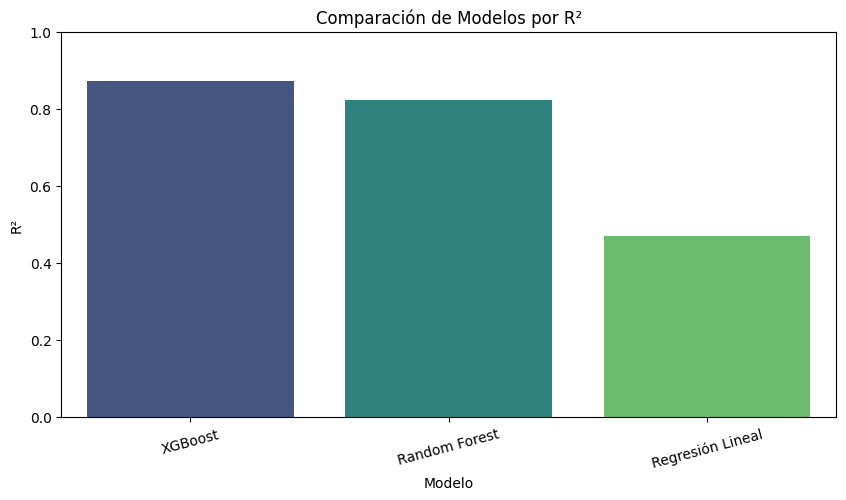

In [14]:
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'XGBoost'],
    'MSE': [mse_lr, mse_rf, mse_xgb],
    'R²': [r2_lr, r2_rf, r2_xgb]
}).sort_values('R²', ascending=False)

print(results)

# Grafico de comparación
plt.figure(figsize=(10, 5))
sns.barplot(data=results, x='Modelo', y='R²', palette='viridis')
plt.title('Comparación de Modelos por R²')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

### 3.4. Comparación Predicciones vs Valores Reales (XGBoost)

Para evaluar la calidad de las predicciones del modelo XGBoost, se visualizó la comparación entre los **valores reales** y los **valores predichos** en un gráfico de dispersión.

El gráfico muestra los puntos correspondientes a las predicciones, donde la línea diagonal representada por `k--` indica los valores donde la predicción es igual al valor real.

#### **Interpretación:**
- Los puntos cercanos a la línea diagonal representan las predicciones más precisas.
- La dispersión de puntos indica cuán cerca están las predicciones de los valores reales.
- Cuanto más cerca estén los puntos de la línea, mejor es el desempeño del modelo.

Este tipo de análisis ayuda a identificar la capacidad del modelo para generalizar sobre los datos no vistos.

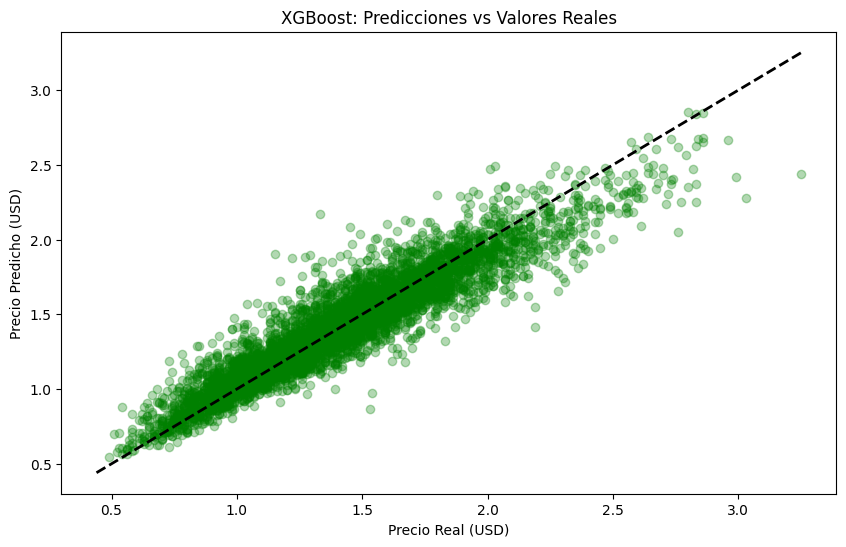

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Precio Real (USD)')
plt.ylabel('Precio Predicho (USD)')
plt.title('XGBoost: Predicciones vs Valores Reales')
plt.show()

### Análisis y Conclusiones de los Modelos Predictivos

#### **Modelos Entrenados**
Se entrenaron tres modelos de Machine Learning para predecir el precio promedio de los aguacates (`AveragePrice`): **Regresión Lineal**, **Random Forest** y **XGBoost**. A continuación, se describen los resultados y el rendimiento de cada modelo.

#### **1. Regresión Lineal**
- **MSE**: 0.0854
- **R²**: 0.4705

La **Regresión Lineal** resultó ser el modelo con el peor desempeño en comparación con los otros dos modelos. Con un **R²** de 0.4705, el modelo logra explicar solo el 47% de la variabilidad en el precio promedio de los aguacates. Esto indica que la relación entre las variables es más compleja de lo que la regresión lineal puede capturar, resultando en predicciones menos precisas. 

#### **2. Random Forest**
- **MSE**: 0.0283
- **R²**: 0.8248

El **Random Forest** presentó un rendimiento significativamente mejor que la regresión lineal, con un **R²** de 0.8248, lo que sugiere que el modelo es capaz de capturar un alto porcentaje de la variabilidad del precio de los aguacates. El **MSE** también es mucho más bajo en comparación con la regresión lineal, lo que indica que las predicciones son mucho más precisas. Random Forest es ideal para manejar relaciones no lineales y para lidiar con outliers en los datos.

#### **3. XGBoost**
- **MSE**: 0.0205
- **R²**: 0.8727

El **XGBoost** es el modelo con el mejor desempeño, alcanzando un **R²** de 0.8727, lo que significa que captura el 87% de la variabilidad en el precio promedio. El **MSE** es el más bajo de los tres modelos, lo que indica que las predicciones de XGBoost son las más precisas. XGBoost ha demostrado ser un modelo muy eficiente y robusto, especialmente para tareas de predicción como esta.

#### **Comparación de Modelos**
| Modelo            | **MSE**   | **R²**   |
|-------------------|-----------|----------|
| Regresión Lineal  | 0.0854    | 0.4705   |
| Random Forest     | 0.0283    | 0.8248   |
| XGBoost           | 0.0205    | 0.8727   |

De acuerdo con los resultados, **XGBoost** es el modelo con el mejor rendimiento, seguido de **Random Forest**. La **Regresión Lineal** tiene un desempeño inferior, lo que sugiere que no es el enfoque más adecuado para este conjunto de datos debido a su simplicidad y la naturaleza no lineal de las relaciones.

#### **Visualización de Resultados**
El gráfico de dispersión de las predicciones frente a los valores reales para **XGBoost** muestra que el modelo realiza predicciones con una alta precisión, con pocos puntos que se desvían significativamente de la línea de predicción perfecta. Esto valida que XGBoost es capaz de ajustarse muy bien a los datos y producir predicciones precisas.

#### **Conclusiones Finales**
- **Mejor Modelo**: El **XGBoost** mostró el mejor rendimiento, con el mayor valor de **R²** (0.8727). Este modelo es capaz de capturar la complejidad y no linealidad en los datos de forma muy eficaz.
  
- **Alternativa sólida**: **Random Forest** también presentó un buen rendimiento, con un **R²** de 0.8248. Este modelo es robusto y adecuado para este tipo de tareas donde las relaciones entre las variables son complejas.

- **Limitaciones de la Regresión Lineal**: La **Regresión Lineal** tiene el peor desempeño de los tres modelos, con un **R²** de solo 0.4705. Aunque es útil para problemas más simples, no es adecuada para este tipo de datos con relaciones no lineales complejas.

#### **Recomendaciones**
- **Modelo más efectivo**: Se recomienda utilizar **XGBoost** para la predicción del precio de los aguacates debido a su alto rendimiento y capacidad para manejar datos complejos.
  
- **Optimización de Modelos**: Para mejorar aún más el rendimiento, se podría realizar una optimización de hiperparámetros en **XGBoost** o **Random Forest** para obtener una ligera mejora en las métricas de desempeño.

En resumen, **XGBoost** es el mejor modelo para este problema de predicción de precios, proporcionando resultados altamente precisos y robustos frente a los outliers.
